# What is PCA

Principal Component Analysis (PCA) is a dimensionality-reduction technique that is often used to transform a high-dimensional dataset into a smaller-dimensional subspace prior to running a machine learning algorithm on the data.

## When should you use PCA?

It is often helpful to use a dimensionality-reduction technique such as PCA prior to performing machine learning because:

   * Reducing the dimensionality of the dataset reduces the size of the space on which k-nearest-neighbors (kNN) must calculate distance, which improve the performance of kNN.
   * Reducing the dimensionality of the dataset reduces the number of degrees of freedom of the hypothesis, which reduces the risk of overfitting.
   * Most algorithms will run significantly faster if they have fewer dimensions they need to look at.
   * Reducing the dimensionality via PCA can simplify the dataset, facilitating description, visualization, and insight.


## What does PCA do?

Principal Component Analysis does just what it advertises; it finds the principal components of the dataset. PCA transforms the data into a new, lower-dimensional subspace—into a new coordinate system—. In the new coordinate system, the first axis corresponds to the first principal component, which is the component that explains the greatest amount of the variance in the data.

## Math of PCA

In [1]:
import numpy as np

In [2]:
# Create (6x2) array
A = np.array([
        [ 3,  7],
        [-4, -6],
        [ 7,  8],
        [ 1, -1],
        [-4, -1],
        [-3, -7]
    ])

m,n = A.shape # m-observations, n-features

print("Array:")
print(A) # our array

print("---")
print("Dimensions:")
print(A.shape) # shape

print("---")
print("Mean across Rows:")
print(np.mean(A,axis=0))

Array:
[[ 3  7]
 [-4 -6]
 [ 7  8]
 [ 1 -1]
 [-4 -1]
 [-3 -7]]
---
Dimensions:
(6, 2)
---
Mean across Rows:
[0. 0.]


In [3]:
# Note: you can convert this easily into a DataFrame ...
import pandas as pd
df = pd.DataFrame(A, columns = ['a0', 'a1'])
print(df)

   a0  a1
0   3   7
1  -4  -6
2   7   8
3   1  -1
4  -4  -1
5  -3  -7


In [4]:
# ... and can go from df back to np.array
df.values

array([[ 3,  7],
       [-4, -6],
       [ 7,  8],
       [ 1, -1],
       [-4, -1],
       [-3, -7]])

### Covariance

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# makes charts pretty
import seaborn as sns
sns.set(color_codes=True)

/Users/hkapoor/ws/virtualenvs/magna-pipeline/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


Text(0.5, 1.0, 'Dataset $A$')

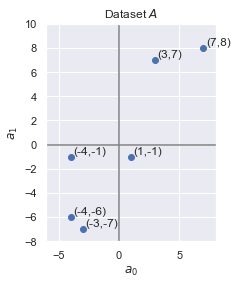

In [6]:
# plots
plt.scatter(A[:,0],A[:,1])

# annotations
for i in range(m):
    plt.annotate('('+str(A[i,0])+','+str(A[i,1])+')',(A[i,0]+0.2,A[i,1]+0.2))

# axes
plt.plot([-6,8],[0,0],'grey') # x-axis
plt.plot([0,0],[-8,10],'grey') # y-axis
plt.axis([-6, 8, -8, 10])
plt.axes().set_aspect('equal')

# labels
plt.xlabel("$a_0$")
plt.ylabel("$a_1$")
plt.title("Dataset $A$")

Sample covariance between $a_0$ and $a_1$:

$$
cov_{a_0,a_1} =\frac{\sum_{i=0}^{m-1}(a_0^i - \bar{a_0})(a_1^i - \bar{a_1})}{m-1}
$$

In [7]:
# Calculate covariance between a0 and a1
a0 = A[:,0]
a1 = A[:,1]
prod = a0*a1 # element-wise product, ignore means as zero already
print("Length of prod equals " + str(len(prod)))
print("---")
print("Covariance:")
print(np.sum(prod)/(m-1))

Length of prod equals 6
---
Covariance:
25.0


In [8]:
# Get more stuff using NumPy's covariance method
np.cov(a0,a1)

array([[20., 25.],
       [25., 40.]])

Linear Algebra way:
$$
\Sigma = \frac{A^TA}{(m-1)}
$$

In [9]:
# Aside: What does A.T do?
A.T # or np.transpose(A)

array([[ 3, -4,  7,  1, -4, -3],
       [ 7, -6,  8, -1, -1, -7]])

In [10]:
# Matrix Multiplication, note @ operator
A.T @ A # or np.dot(A.T,A)

array([[100, 125],
       [125, 200]])

In [11]:
# Need to divide by (m-1) to yield true Sample Covariance Matrix
# Let's call this Sigma
Sigma = (A.T @ A)/(m-1) # or np.cov(A.T)
Sigma

array([[20., 25.],
       [25., 40.]])

### 4. Eigen-decomposition of $\Sigma$

According to [Wikipedia article on PCA](https://en.m.wikipedia.org/wiki/Principal_component_analysis), *"PCA can be done by eigenvalue decomposition of a data covariance (or correlation) matrix or singular value decomposition of a data matrix."* I choose the first approach.

*$\Sigma$ is a real, symmetric matrix; thus, it has 1) real eigenvalues and 2) orthogonal eigenvectors.

In [12]:
l, X = np.linalg.eig(Sigma)
print("Eigenvalues:")
print(l)
print("---")
print("Eigenvectors:")
print(X)

Eigenvalues:
[ 3.07417596 56.92582404]
---
Eigenvectors:
[[-0.82806723 -0.56062881]
 [ 0.56062881 -0.82806723]]


Recall from your Linear Algebra class that the following should hold:

\begin{eqnarray}
\Sigma x_0 &=& \lambda_0 x_0 \nonumber \\
\Sigma x_1 &=& \lambda_1 x_1 \nonumber \\
\end{eqnarray}

In [13]:
# let's check the first Eigenvalue, Eigenvector combination
print("Sigma times eigenvector:")
print(Sigma @ X[:,0]) # 2x2 times 2x1
print("Eigenvalue times eigenvector:")
print(l[0] * X[:,0]) # scalar times 2x1, ANNOYING - MUST USE * vs. @

Sigma times eigenvector:
[-2.54562438  1.72347161]
Eigenvalue times eigenvector:
[-2.54562438  1.72347161]


In [14]:
# ... and the second
print("Sigma times eigenvector:")
print(Sigma @ X[:,1]) # 2x2 times 2x1
print("Eigenvalue times eigenvector:")
print(l[1] * X[:,1]) # scalar times 2x1, ANNOYING - MUST USE * vs. @

Sigma times eigenvector:
[-31.91425695 -47.13840945]
Eigenvalue times eigenvector:
[-31.91425695 -47.13840945]


In [15]:
print("The first principal component is evector with largest evalue:")
print(X[:,1])
print("---")
print("Second principal component:")
print(X[:,0])

The first principal component is evector with largest evalue:
[-0.56062881 -0.82806723]
---
Second principal component:
[-0.82806723  0.56062881]


In [16]:
# Orthogonal? A: Yes
X[:,1].T @ X[:,0]

0.0

In [17]:
# Length 1? A: Yes
print(np.sqrt(X[:,1].T @ X[:,1]))
print(np.sqrt(X[:,0].T @ X[:,0]))

1.0
1.0


/Users/hkapoor/ws/virtualenvs/magna-pipeline/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'Eigenvectors of $\\Sigma$')

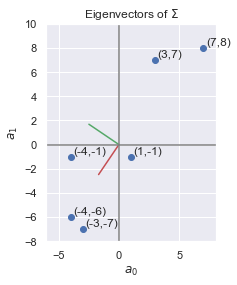

In [18]:
# plots
plt.scatter(A[:,0],A[:,1])
scale = 3 # increase this scaling factor to highlight these vectors
plt.plot([0,X[0,1]*scale],[0,X[1,1]*scale],'r') # First principal component
plt.plot([0,X[0,0]*scale],[0,X[1,0]*scale],'g') # Second principal component

# annotations
for i in range(m):
    plt.annotate('('+str(A[i,0])+','+str(A[i,1])+')',(A[i,0]+0.2,A[i,1]+0.2))

# axes
plt.plot([-6,8],[0,0],'grey') # x-axis
plt.plot([0,0],[-8,10],'grey') # y-axis
plt.axis([-6, 8, -8, 10])
plt.axes().set_aspect('equal')

# labels
plt.xlabel("$a_0$")
plt.ylabel("$a_1$")
plt.title("Eigenvectors of $\Sigma$")

### 5. Dimensionality Reduction: 2D to 1D

In [19]:
# change to matrix
Amat = np.asmatrix(A)
Xmat = np.asmatrix(X)

In [20]:
# Choose eigenvector with highest eigenvalue as first principal component
pc1 = Xmat[:,1]

In [21]:
Acomp = Amat @ pc1 # 6x2 @ 2x1 yields 6x1
print("Compressed version of A:")

print(Acomp)

Compressed version of A:
[[ -7.47835704]
 [  7.21091862]
 [-10.54893951]
 [  0.26743842]
 [  3.07058247]
 [  7.47835704]]


In [22]:
Arec = Acomp @ pc1.T # 6x1 @ 1x2, this breaks with np.array
print("Reconstruction from 1D compression of A:")
print(Arec)

Reconstruction from 1D compression of A:
[[ 4.1925824   6.1925824 ]
 [-4.04264872 -5.97112541]
 [ 5.9140394   8.73523112]
 [-0.14993368 -0.22145699]
 [-1.72145699 -2.54264872]
 [-4.1925824  -6.1925824 ]]


In [24]:
print(np.linalg.matrix_rank(Amat)) # originally a Rank 2 matrix
print(np.linalg.matrix_rank(Arec)) # reconstructed matrix is Rank 1

2
1


By tacking on the Rank-1 matrix related to the 2nd eigenvector you get back to the original data:

In [25]:
# Add the Rank 1 matrix for the other vector to recover A completely
Amat @ Xmat[:,1] @ Xmat[:,1].T + Amat @ Xmat[:,0] @ Xmat[:,0].T

matrix([[ 3.,  7.],
        [-4., -6.],
        [ 7.,  8.],
        [ 1., -1.],
        [-4., -1.],
        [-3., -7.]])

In [26]:
# Why does this work? Well, recall 
# X @ X.T is identity matrix as X is orthonormal
A @ Xmat @ Xmat.T

matrix([[ 3.,  7.],
        [-4., -6.],
        [ 7.,  8.],
        [ 1., -1.],
        [-4., -1.],
        [-3., -7.]])

/Users/hkapoor/ws/virtualenvs/magna-pipeline/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1.0, 'Back to $A$')

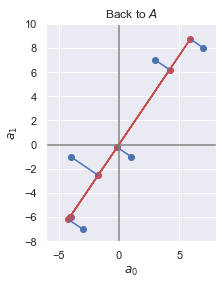

In [27]:
# plots
plt.scatter(A[:,0], A[:,1]) # A in blue
plt.plot(Arec[:,0],Arec[:,1],'r', marker='o') # Arec in RED

# across observations
for i in range(m):
    e = np.vstack((A[i],Arec[i]))
    plt.plot(e[:,0],e[:,1],'b') # BLUE

# axes
plt.plot([-6,8],[0,0],'grey') # x-axis
plt.plot([0,0],[-8,10],'grey') # y-axis
plt.axis([-6, 8, -8, 10])
plt.axes().set_aspect('equal')

# labels
plt.xlabel("$a_0$")
plt.ylabel("$a_1$")
plt.title("Back to $A$")

[Wicked animated GIF which illustrates PCA](http://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)

Magically, eigen-decomposition (or PCA) finds the line where
1. the spread of values along the black line is **maximal**
2. the projection error (sum of red lines) is **minimal**

<img src="https://i.stack.imgur.com/Q7HIP.gif">

### 6. Variance Retained

In [28]:
# Average squared projection error using PC1
unexp_err = np.mean(np.sum(np.square(Amat - Arec),axis=1))
total_err = np.mean(np.sum(np.square(Amat),axis=1))
ret_err = 1 - (unexp_err / total_err) # percent of variance retained
print(ret_err)

0.9487637339278753


### 7. Summary of Eigen-decomposition Approach

1. Normalize columns of $A$ so that each feature has zero mean
1. Compute sample covariance matrix $\Sigma = {A^TA}/{(m-1)}$
1. Perform eigen-decomposition of $\Sigma$ using `np.linalg.eig(Sigma)`
1. Compress by ordering $k$ evectors according to largest evalues and compute $AX_k$
1. Reconstruct from compressed version by computing $A X_k X_k^T$

## Implementation with scikit-learn

In [30]:
from sklearn import datasets
from sklearn.decomposition import PCA

Let's try going from 4D to 2D using the classical iris dataset.

In [31]:
iris = datasets.load_iris() # Bunch object
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [32]:
A0 = iris.data # np.array

print("Dimensions:")
print(A0.shape)

print("---")
print("First 5 samples:")
print(A0[:5,:])

print("---")
print("Feature names:")
print(iris.feature_names)

Dimensions:
(150, 4)
---
First 5 samples:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
---
Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [33]:
# Eigen-decomposition: 5-step process

# 1. Normalize columns of $A$ so that each feature has zero mean
mu = np.mean(A0,axis=0)
A = A0 - mu
print("Does A have zero mean across rows?")
print(np.mean(A,axis=0))

# 2. Compute sample covariance matrix $\Sigma = {A^TA}/{(m-1)}$
m,n = A.shape
Sigma = (A.T @ A)/(m-1)
print("---")
print("Sigma:")
print(Sigma)

# 3. Perform eigen-decomposition of $\Sigma$ using `np.linalg.eig(Sigma)`
l,X = np.linalg.eig(Sigma)
print("---")
print("Evalues:")
print(l)
print("---")
print("Evectors:")
print(X)

# 4. Compress by ordering $k$ evectors according to largest evalues and compute $AX_k$
print("---")
print("Compressed - 4D to 2D:")
Acomp = A @ X[:,:2] # first 2 evectors
print(Acomp[:5,:]) # first 5 observations

# 5. Reconstruct from compressed version by computing $A X_k X_k^T$
print("---")
print("Reconstructed version - 2D to 4D:")
Arec = A @ X[:,:2] @ X[:,:2].T # first 2 evectors
print(Arec[:5,:]+mu) # first 5 obs, adding mu to compare to original

Does A have zero mean across rows?
[-1.12502600e-15 -7.60872846e-16 -2.55203266e-15 -4.48530102e-16]
---
Sigma:
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
---
Evalues:
[4.22824171 0.24267075 0.0782095  0.02383509]
---
Evectors:
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]
---
Compressed - 4D to 2D:
[[-2.68412563 -0.31939725]
 [-2.71414169  0.17700123]
 [-2.88899057  0.14494943]
 [-2.74534286  0.31829898]
 [-2.72871654 -0.32675451]]
---
Reconstructed version - 2D to 4D:
[[5.08303897 3.51741393 1.40321372 0.21353169]
 [4.7462619  3.15749994 1.46356177 0.24024592]
 [4.70411871 3.1956816  1.30821697 0.17518015]
 [4.6422117  3.05696697 1.46132981 0.23973218]
 [5.07175511 3.5

In [34]:
# Using sklearn.decomposition.PCA

pca = PCA(n_components=2) # two components
pca.fit(A0) # run PCA, putting in raw version for fun

print("Principal components:")
print(pca.components_)

print("---")
print("Compressed - 4D to 2D:")
print(pca.transform(A0)[:5,:]) # first 5 obs

print("---")
print("Reconstructed - 2D to 4D:")
print(pca.inverse_transform(pca.transform(A0))[:5,:]) # first 5 obs

Principal components:
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
---
Compressed - 4D to 2D:
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]
---
Reconstructed - 2D to 4D:
[[5.08303897 3.51741393 1.40321372 0.21353169]
 [4.7462619  3.15749994 1.46356177 0.24024592]
 [4.70411871 3.1956816  1.30821697 0.17518015]
 [4.6422117  3.05696697 1.46132981 0.23973218]
 [5.07175511 3.52655486 1.36373845 0.19699991]]


## Another Example

In [35]:
from __future__ import print_function, division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting style defaults
import seaborn as sns; sns.set()

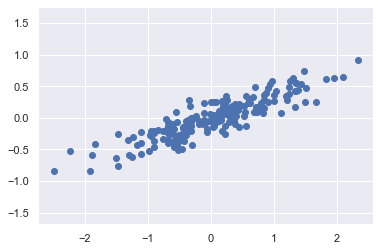

In [36]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

We can see that there is a definite trend in the data. What PCA seeks to do is to find the **Principal Axes** in the data, and explain how important those axes are in describing the data distribution:

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

[0.7625315 0.0184779]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


To see what these numbers mean, let's view them as vectors plotted on top of the data:

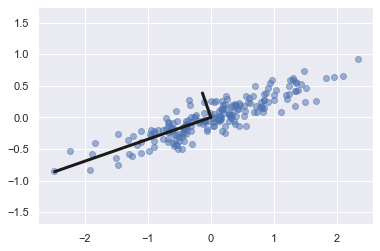

In [38]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

Notice that one vector is longer than the other. In a sense, this tells us that that direction in the data is somehow more "important" than the other direction.
The explained variance quantifies this measure of "importance" in direction.

Another way to think of it is that the second principal component could be **completely ignored** without much loss of information! Let's see what our data look like if we only keep 95% of the variance:

In [39]:
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


By specifying that we want to throw away 5% of the variance, the data is now compressed by a factor of 50%! Let's see what the data look like after this compression:

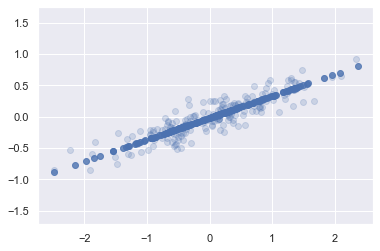

In [40]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.  We see that after truncating 5% of the variance of this dataset and then reprojecting it, the "most important" features of the data are maintained, and we've compressed the data by 50%!

This is the sense in which "dimensionality reduction" works: if you can approximate a data set in a lower dimension, you can often have an easier time visualizing it or fitting complicated models to the data.

In [50]:
!pip install seaborn